In [149]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import datetime
import seaborn
import warnings
from matplotlib.patches import Rectangle
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (16,7)

# MAKE SURE ALL OF THESE ARE INSTALLED

In [150]:
df = pd.read_csv('data/combined_tweets_filtered.csv')
users = df["user"].unique()

In [151]:
sum_rt = df["retweets"].tolist()
sum_rep = df["replies"].tolist()
sum_likes = df["likes"].tolist()
sum_quotes = df["quotes"].tolist()

engagements = []

for index in range(len(sum_rt)):
    sum_eng = sum_rt[index] + sum_rep[index] + sum_likes[index] + sum_quotes[index]
    engagements.append(sum_eng)

df["engagements"] = engagements

viz_df = df.loc[df["has_viz"] == True]
nonviz_df = df.loc[df["has_viz"] == False]

noviz = nonviz_df["engagements"].tolist()
viz = viz_df["engagements"].tolist()

data = [noviz, viz]
# df["engagements"]

In [152]:
def get_engagements(df):
    viz_df = df.loc[df["has_viz"] == True]
    no_viz_df = df.loc[df["has_viz"] == False]
    
    viz_retweets = viz_df["retweets"].sum()
    viz_replies = viz_df["replies"].sum()
    viz_likes = viz_df["likes"].sum()
    viz_quotes = viz_df["quotes"].sum()
    
    no_viz_retweets = no_viz_df["retweets"].sum()
    no_viz_replies = no_viz_df["replies"].sum()
    no_viz_likes = no_viz_df["likes"].sum()
    no_viz_quotes = no_viz_df["quotes"].sum()
    
    viz_engagements = viz_retweets + viz_replies + viz_likes + viz_quotes
    no_viz_engagements = no_viz_retweets + no_viz_replies + no_viz_likes + no_viz_quotes
    
    total_engagements = viz_engagements + no_viz_engagements
    
    non_viz_tweets = len(no_viz_df)
    viz_tweets = len(viz_df)
    
#     print("viz tweets:", viz_tweets)
#     print("non viz tweets:", non_viz_tweets)
    
#     print("visualization tweet engagements: ", viz_engagements)
#     print("no visualization tweet engagements: ", no_viz_engagements)
#     print("total engagements: ", total_engagements)
    
    return viz_engagements, no_viz_engagements 

In [153]:
def get_tweets(df):
    viz_df = df.loc[df["has_viz"] == True]
    no_viz_df = df.loc[df["has_viz"] == False]
    
    non_viz_tweets = len(no_viz_df)
    viz_tweets = len(viz_df)
    
    return viz_tweets, non_viz_tweets

In [154]:
def show_agg_pies(df):
    all_viz_tweets = df.loc[df["has_viz"] == True]
    no_viz_tweets = df.loc[df["has_viz"] == False]
    
    labels = 'Viz', ' No-Viz'
    all_viz_tweets = len(all_viz_tweets)
    no_viz_tweets = len(no_viz_tweets)
    
#     all_viz_tweets, non_viz_tweets = len(all_viz_tweets), len(no_viz_tweets)
    sizes = []
    sizes.append(all_viz_tweets)
    sizes.append(no_viz_tweets)
    
    tweet_label = 'Viz: ' + str(all_viz_tweets)
    no_tweet_label = 'No-viz: ' + str(no_viz_tweets)
    
    legend_labels_1 = tweet_label, no_tweet_label
    
    #----------------------------------------------------------------------------#
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels_eng = 'Viz ', 'Non-Viz '
    viz_engagements, non_viz_engagements = get_engagements(df)
    sizes_eng = []
    sizes_eng.append(viz_engagements)
    sizes_eng.append(non_viz_engagements)
    
    eng_viz_label = 'Viz : ' + str(viz_engagements)
    eng_noviz_label = 'Non-Viz : ' + str(non_viz_engagements)
    legend_labels_2 = eng_viz_label, eng_noviz_label
    
    
    #----------------------------------------------------------------------------#
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    ax1.set_title("All tweets distribution")
    ax1.legend(legend_labels_1)
    
    ax2.pie(sizes_eng, labels=labels_eng, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax2.set_title("Proportion of Engagements")
    ax2.legend(legend_labels_2)
    
    
    fig.suptitle('Overall engagement statistics')

    plt.tight_layout()
    
    
    #-----------------------------------------------------------------------------#

#     plt.show()

In [155]:
def show_pies(disp_df, authorname):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Viz ', 'Non-Viz '
    viz_engagements, non_viz_engagements = get_engagements(disp_df)
    sizes = []
    sizes.append(viz_engagements)
    sizes.append(non_viz_engagements)
    
    viz_label = 'Viz: ' + str(viz_engagements)
    non_viz_label = 'Non-viz: ' + str(non_viz_engagements)
    
    legend_labels_1 = viz_label, non_viz_label
    
    #----------------------------------------------------------------------------#
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels2 = 'Viz', ' Viz'
    viz_tweets, non_viz_tweets = get_tweets(disp_df)
    sizes_2 = []
    sizes_2.append(viz_tweets)
    sizes_2.append(non_viz_tweets)
    
    tweet_label = 'Tweets with viz: ' + str(viz_tweets)
    no_tweet_label = 'Tweets without viz: ' + str(non_viz_tweets)
    
    legend_labels_2 = tweet_label, no_tweet_label
    
    #-----------------------------------------------------------------------------#
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
#     ax1.set_title("Proportion of Engagements")
    ax1.axis('equal')
    ax1.legend(legend_labels_1)
    ax1.set_title("Proportion of tweet engagements by @"+authorname)
    
    ax2.set_title("Proportion of viz and non-viz tweets by @" + authorname)
    ax2.pie(sizes_2, labels=labels2, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.axis('equal')
    ax2.legend(legend_labels_2)
    
#     fig.suptitle('Horiziontal subplots')
    plt.tight_layout()
    
    

#     plt.show()

In [156]:
def show_bars(df, authors):
    viz_df = df.loc[df["has_viz"] == True]
    no_viz_df = df.loc[df["has_viz"] == False]
    
    viz_retweets = viz_df["retweets"].sum()
    viz_replies = viz_df["replies"].sum()
    viz_likes = viz_df["likes"].sum()
    viz_quotes = viz_df["quotes"].sum()
    
    no_viz_retweets = no_viz_df["retweets"].sum()
    no_viz_replies = no_viz_df["replies"].sum()
    no_viz_likes = no_viz_df["likes"].sum()
    no_viz_quotes = no_viz_df["quotes"].sum()
    
    viz_engagements = [viz_likes, viz_retweets, viz_replies, viz_quotes]
    non_viz_engagements = [no_viz_likes, no_viz_retweets, no_viz_replies, no_viz_quotes]
    
    groups = [[viz_likes, no_viz_likes], 
              [viz_retweets, no_viz_retweets], 
              [viz_replies, no_viz_replies], 
              [viz_quotes, no_viz_quotes]]
    
    labels = ["Likes", "Retweets", "Replies", "Quotes"]
    index_labels = ["With Viz", "Without Viz"]
    
    test_df = pd.DataFrame(groups, index=labels).T
    test_df = test_df.rename(index={0: 'With Viz', 1: 'Without Viz'} )
    
    ax = test_df.plot.bar()
    ax.set_title("Distribution of individual engagements with and without visualizations by @"+authors )
    ax.set_xlabel("Type of Engagement")
    ax.set_ylabel("Number of Engagements")
    

# disp_df = df.loc[df["user"] == "CDCGov"]
# show_bars(disp_df, "CDCGov")    

In [157]:
def baw(authorname):
    noviz_func_df = nonviz_df.loc[nonviz_df["user"] == authorname]
    viz_func_df = viz_df.loc[viz_df["user"] == authorname]
    
    noviz_likes = noviz_func_df["likes"].tolist()
    viz_likes = viz_func_df["likes"].tolist()
    
    noviz_eng = noviz_func_df["engagements"].tolist()
    viz_eng = viz_func_df["engagements"].tolist()

    data_likes = [noviz_likes, viz_likes]
    data_eng = [noviz_eng, viz_eng]
    
    no_viz_len = len(data_likes[0])
    viz_len = len(data_likes[1])
    
#     print("noviz n = " + str(len(data_likes[0])))
#     print("viz n = " + str(len(data_eng[1])))
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.boxplot(data_likes, 
                notch=False, 
                showfliers=False, 
                labels=["No-viz (n=" + str(no_viz_len) + ")", "Viz(n=" + str(viz_len) + ")"])
    ax1.set_xlabel("Type of Tweet")
    ax1.set_ylabel("Likes")
    ax1.set_title("Overall likes response to Tweets by @"+authorname)
    
    ax2.boxplot(data_eng, 
                notch=False, 
                showfliers=False, 
                labels=["no-viz (n=" + str(no_viz_len) + ")", "viz(n=" + str(viz_len) + ")"])
    ax2.set_xlabel("Type of Tweet")
    ax2.set_ylabel("Engagements")
    ax2.set_title("Overall engagement response to Tweets by @"+authorname)
    
    fig.suptitle('Viz vs Non-viz Engagement')
    plt.tight_layout()


In [158]:
def buildBins(min = 0, spacing = 1, numbins = 10) :
    ret = [min + float(x)*spacing for x in range(numbins)]
    return ret

def binCenters(bins):
    mids = []
    for i in range(len(bins)-1) :
        lower = bins[i]
        upper = bins[i+1]
        mid = (lower + upper) / 2
        mids.append(mid)
    return mids

In [159]:
def normalized_histo():
    # Build the bins by user pref
    bins = buildBins(min = 1, spacing = 50, numbins = 30)

    colors = ["orange", "blue"]
    handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
    labels = ["Viz", "No Viz"]
    
    brs = {"Low": (0,500), "Middle": (200,1500), "High": (5000, 30000)}
    binrange_low = brs["Low"]
    binrange_mid = brs["Middle"]
    binrange_high = brs["High"]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1 = seaborn.histplot(data,element="step",binrange=binrange_low,stat='density', common_norm=False, fill=False)
    ax1.legend(handles, labels)
    ax1.set_xlabel("Number of Engagements")
    ax1.set_title(r"Engagement Value Density for Low-Range Tweets : $" +str(binrange_low[0])+"\leq$ Engagements < "+str(binrange_low[1]))
    
#     ax2 = seaborn.histplot(data,element="step",binrange=binrange_mid,stat='density', common_norm=False, fill=False)
#     ax2.legend(handles, labels)
#     ax2.set_xlabel("Number of Engagements")
#     ax2.set_title(r"Engagement Value Density for Mid-Range Tweets : $" +str(binrange_mid[0])+"\leq$ Engagements < "+str(binrange_mid[1]))
    
#     ax3 = seaborn.histplot(data,element="step",binrange=binrange_high,stat='density', common_norm=False, fill=False)
#     ax3.legend(handles, labels)
#     ax3.set_xlabel("Number of Engagements")
#     ax3.set_title(r"Engagement Value Density for High-Range Tweets : $" +str(binrange_high[0])+"\leq$ Engagements < "+str(binrange_high[1]))

    fig.suptitle('Normalized distributions of engagements by range')
    plt.tight_layout()
    
# normalized_histo()

In [160]:
def gen_time_series(test_df, authors):
    test_df["date"] = test_df["date"].astype("datetime64")
    uq_months = test_df['date'].dt.strftime("%m/%y").unique().tolist()

    viz_engagements_list = []
    non_viz_engagements_list = []

    for month in uq_months:
        month_df = test_df.loc[test_df['date'].dt.strftime("%m/%y") == month]

        viz_df = month_df.loc[month_df["has_viz"] == True]
        no_viz_df = month_df.loc[month_df["has_viz"] == False]

        viz_retweets = viz_df["retweets"].sum()
        viz_replies = viz_df["replies"].sum()
        viz_likes = viz_df["likes"].sum()
        viz_quotes = viz_df["quotes"].sum()

        viz_engagements = viz_retweets + viz_replies + viz_likes + viz_quotes

        no_viz_retweets = no_viz_df["retweets"].sum()
        no_viz_replies = no_viz_df["replies"].sum()
        no_viz_likes = no_viz_df["likes"].sum()
        no_viz_quotes = no_viz_df["quotes"].sum()

        non_viz_engagements = no_viz_retweets + no_viz_replies + no_viz_likes + no_viz_quotes

        viz_engagements_list.append(viz_engagements)
        non_viz_engagements_list.append(non_viz_engagements)

    # print(viz_engagements_list)
    # print(non_viz_engagements_list)
    # print(uq_months)

    ts_df = pd.DataFrame(columns=["Months", "Viz Engagements", "Non-Viz Engagements"])

    ts_df["Months"] = uq_months
    ts_df["Viz Engagements"] = viz_engagements_list
    ts_df["Non-Viz Engagements"] = non_viz_engagements_list

    ts_df = ts_df.set_index(ts_df["Months"])
    ts_df = ts_df.drop(columns=["Months"])

    ts_df_plot = ts_df.plot(label='Engagements', color=['orange', 'green'])
    ts_df_plot.set_title("Engagements over time of tweets by @"+authors)
    ts_df_plot.set_xlabel("Date")
    ts_df_plot.set_ylabel("Engagements")



In [161]:
def show_overall_eng():
    # Creating plot
    plt.boxplot(data, notch=False, showfliers=False, labels=["no-viz", "viz"])
    plt.ylabel("Engagements")
    plt.xlabel("Type of visualization")
    plt.title("Distribution of overall engagements")

    # show plot
    plt.show()


# The following visualizations display engagement information for the collected samples of tweets and authors:

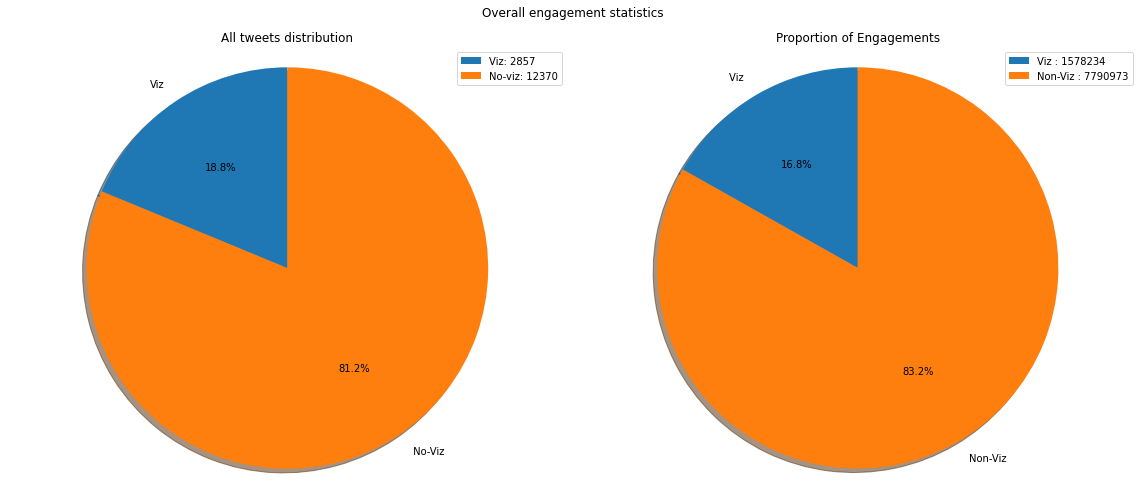

In [162]:
show_agg_pies(df)

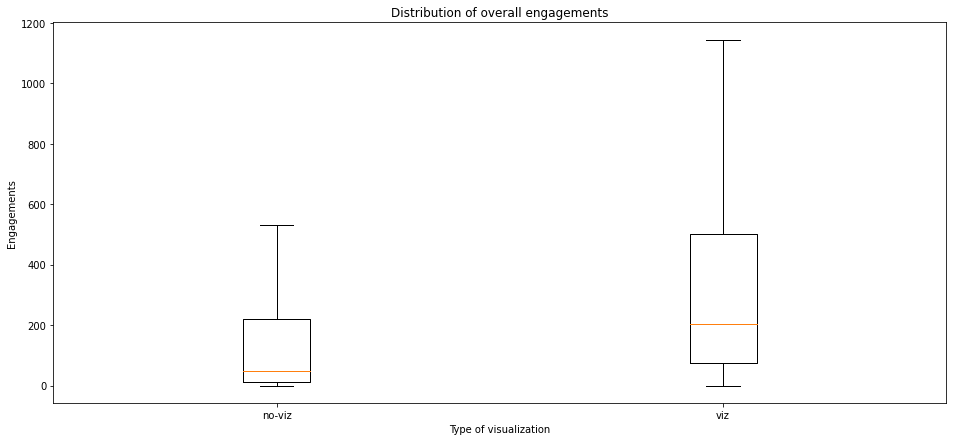

In [163]:
show_overall_eng()

# Select an author from the dropdown below to view information specific to their tweets and engagements:

In [164]:
def f(authors):
    disp_df = df.loc[df["user"] == authors]
    show_pies(disp_df, authors)
    show_bars(disp_df, authors)
    gen_time_series(disp_df, authors)
    baw(authors)

interact(f, authors=users);

interactive(children=(Dropdown(description='authors', options=('abmakulec', 'alicesim', 'AmeshAA', 'amymaxmen'…

In [165]:
a = np.histogram(viz)

# The following normalized histograms display distributions of engagement based on tweet engagement ranges

In [166]:
# Build the bins by user pref
bins = buildBins(min = 1, spacing = 50, numbins = 30)

colors = ["orange", "blue"]
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["Viz", "No Viz"]

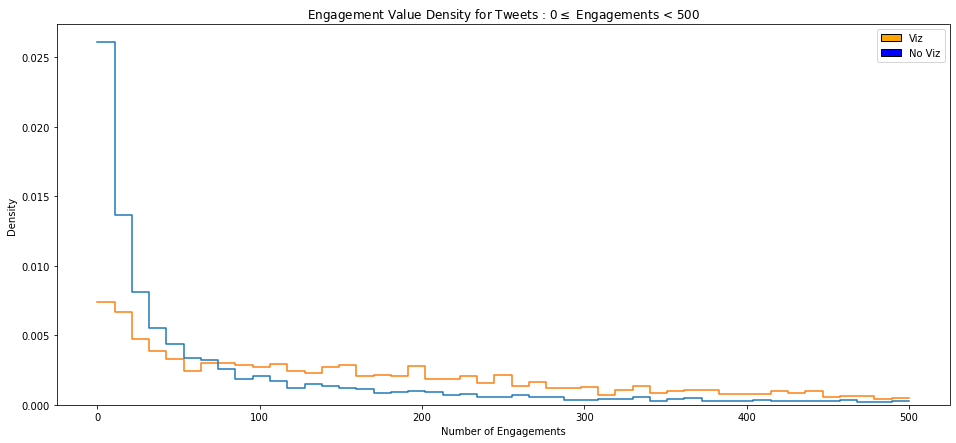

In [167]:
brs = {"Low": (0,500), "Middle": (200,1500), "High": (5000, 30000)}
binrange = brs["Low"]
hp = seaborn.histplot(data,element="step",binrange=binrange,stat='density', common_norm=False, fill=False)

#hp = plt.hist(data, density = True, binrange=(100,1500))
plt.legend(handles, labels)
plt.xlabel("Number of Engagements")
#plt.xticks(np.arange(100, 1400, 200))
plt.title(r"Engagement Value Density for Tweets : $" +str(binrange[0])+"\leq$ Engagements < "+str(binrange[1]))
#plt.title(r'$\alpha\leq\beta$')
plt.show(hp)


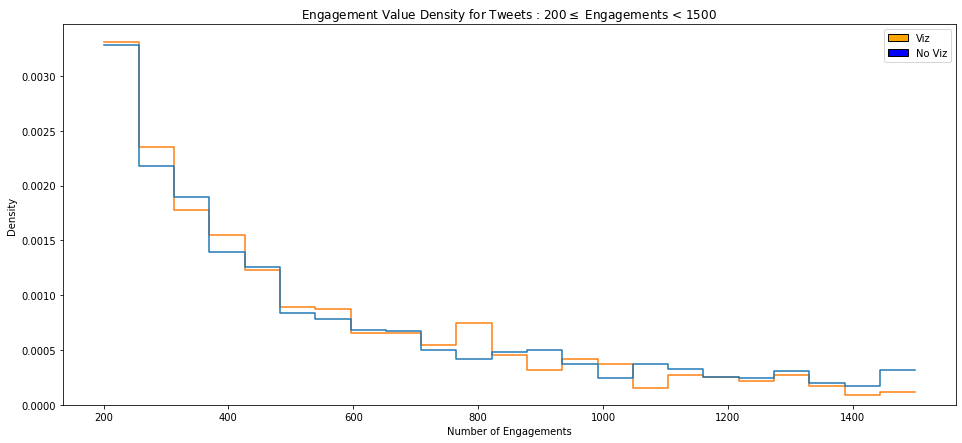

In [168]:
brs = {"Low": (0,500), "Middle": (200,1500), "High": (5000, 30000)}
binrange = brs["Middle"]
hp = seaborn.histplot(data,element="step",binrange=binrange,stat='density', common_norm=False, fill=False)

#hp = plt.hist(data, density = True, binrange=(100,1500))
plt.legend(handles, labels)
plt.xlabel("Number of Engagements")
#plt.xticks(np.arange(100, 1400, 200))
plt.title(r"Engagement Value Density for Tweets : $" +str(binrange[0])+"\leq$ Engagements < "+str(binrange[1]))
#plt.title(r'$\alpha\leq\beta$')
plt.show(hp)


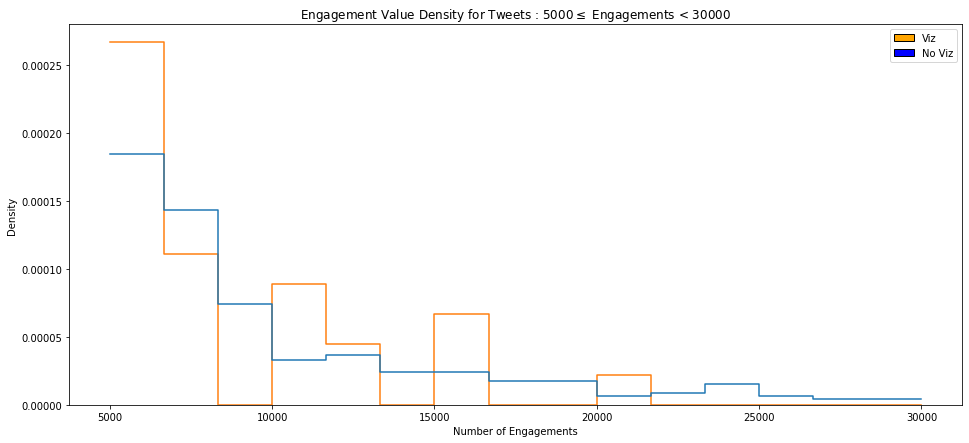

In [169]:
brs = {"Low": (0,500), "Middle": (200,1500), "High": (5000, 30000)}
binrange = brs["High"]
hp = seaborn.histplot(data,element="step",binrange=binrange,stat='density', common_norm=False, fill=False)

#hp = plt.hist(data, density = True, binrange=(100,1500))
plt.legend(handles, labels)
plt.xlabel("Number of Engagements")
#plt.xticks(np.arange(100, 1400, 200))
plt.title(r"Engagement Value Density for Tweets : $" +str(binrange[0])+"\leq$ Engagements < "+str(binrange[1]))
#plt.title(r'$\alpha\leq\beta$')
plt.show(hp)
